In [62]:
#consistency_pre for two porec
import pandas as pd
from porecplot_draw_func import chr_interval,region_reads
region_df = region_reads("/public/home/lizw/task/pore_c/porec_result2/bed/all_chr.bed")
binsize=1000

porec1_path = "/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/pairs/DpnII_run01_TAIR10_unphased.unsorted.pairs"
porec2_path = "/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/pairs/DpnII_run03_TAIR10_unphased.unsorted.pairs"

porec_merge_df = pd.read_feather(porec1_path,comment="#",sep="\t",header=None,names=['readID', 'chr1', 'pos1', 'chr2', 'pos2', 'strand1', 'strand2', 'pair_type', 'align1_idx', 'align2_idx', 'distance_on_read'],converters={'chr1':str,'chr2':str})
porec_merge_df_sub = porec_merge_df.reindex(['readID','chr1','pos1'],axis=1)
porec_merge_df_sub.columns=['readID','chr','pos']
porec_merge_df_sub['chr'] = porec_merge_df_sub['chr'].astype(str)
porec1_df_count,*rest_1 = chr_interval(porec_merge_df_sub,region_df,'pos',binsize)
porec1_df_count_norm = porec1_df_count/porec1_df_count.sum()

porec2_pair_df = pd.read_csv(porec2_path,comment="#",sep="\t",header=None,names=['readID', 'chr1', 'pos1', 'chr2', 'pos2', 'strand1', 'strand2', 'pair_type', 'align1_idx', 'align2_idx', 'distance_on_read'],converters={'chr':str,'chr2':str})
porec2_pair_df_sub = porec2_pair_df.reindex(['readID','chr1','pos1'],axis=1)
porec2_pair_df_sub.columns=['readID','chr','pos']
porec2_pair_df_sub['chr'] = porec2_pair_df_sub['chr'].astype(str)
porec2_df_count,*rest_2 = chr_interval(porec2_pair_df_sub,region_df,'pos',binsize)
porec2_df_count_norm = porec2_df_count/porec2_df_count.sum()

In [99]:
import numpy as np
porec1_df_count.sum()
all_count =np.mean([porec1_df_count.sum(),porec2_df_count.sum()])
porec_contact_interval = pd.merge(porec1_df_count,porec2_df_count,on=['region_index','interval'])
porec_contact_interval_norm = pd.merge(porec1_df_count_norm,porec2_df_count_norm,on=['region_index','interval'])
porec_contact_interval_norm_norm = porec_contact_interval_norm*all_count

In [100]:
porec_contact_interval_norm_norm

pos_count_x  pos_count_y
region_index interval                                      
0            (0, 1000]              279.590135   454.501221
             (1000, 2000]           314.704536   432.081878
             (2000, 3000]           154.370856   203.812207
             (3000, 4000]           182.859899   116.172958
             (4000, 5000]           440.586350   582.902911
...                                        ...          ...
4            (26970000, 26971000]     2.650143     4.076244
             (26971000, 26972000]    11.263110    14.266854
             (26972000, 26973000]     3.975215     6.114366
             (26973000, 26974000]    11.925646     2.038122
             (26974000, 26975000]     1.325072     2.038122

[115932 rows x 2 columns]

In [64]:
porec_merge_df.to_feather("/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/pairs/DpnII_run01_TAIR10_unphased.unsorted.pairs.feather")
porec2_pair_df.to_feather("/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/pairs/DpnII_run03_TAIR10_unphased.unsorted.pairs.feather")

Text(0.98, 127837.02, "Pearson's r 0.8246978637861633")

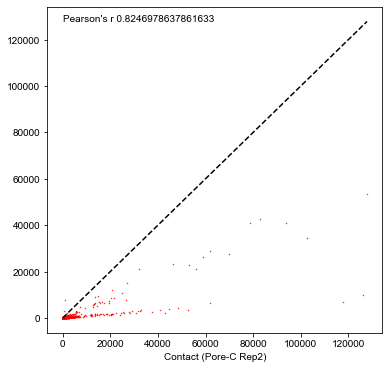

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(6,6))
plt.scatter(data = porec_contact_interval,x='pos_count_x',y='pos_count_y',s=0.2,color='r')
scalemax = porec_contact_interval.max().max()
scalemin = porec_contact_interval.min().min()
plt.xlabel(f'Contact (Pore-C Rep1)')
plt.xlabel(f'Contact (Pore-C Rep2)')
plt.plot((scalemin,scalemax), (scalemin, scalemax), ls='--',c='k')
r = porec_contact_interval['pos_count_x'].corr(porec_contact_interval['pos_count_y'])
plt.text(scalemin-0.02,scalemax+0.02,f'Pearson\'s r {r}')

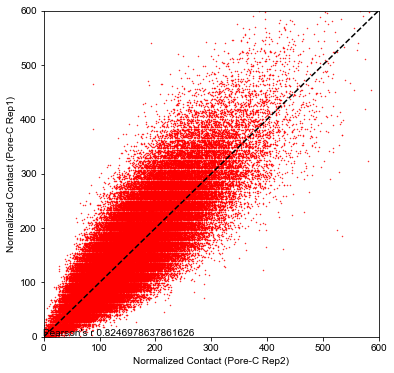

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(6,6))
plt.scatter(data = porec_contact_interval_norm_norm,x='pos_count_x',y='pos_count_y',s=0.2,color='r')
scalemax = porec_contact_interval_norm.max().max()
scalemin = porec_contact_interval_norm.min().min()
plt.ylabel(f'Normalized Contact (Pore-C Rep1)')
plt.xlabel(f'Normalized Contact (Pore-C Rep2)')
plt.ylim(0,600)
plt.xlim(0,600)
plt.plot((0,600), (0,600), ls='--',c='k')
r = porec_contact_interval_norm_norm['pos_count_x'].corr(porec_contact_interval_norm_norm['pos_count_y'])
plt.text(-2,1,f'Pearson\'s r {r}')
plt.savefig('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/norm_pair_contact.svg',format='svg')

In [115]:
%%writefile "~/task/pore_c/tools/jp_note/new/hic_porec_contact_consistency.py"
import pandas as pd
from porecplot_draw_func import chr_interval,region_reads
region_df = region_reads("/public/home/lizw/task/pore_c/porec_result2/bed/all_chr.bed")
binsize=1000

porec_merge = "/public/home/lizw/task/pore_c/porec_result/20210421_merge_result/pairs/cis.txt"
hic_path = "/public/home/lizw/task/pore_c/DpnII_hic/aligned/cis.txt"

porec_merge_df = pd.read_csv("/public/home/lizw/task/pore_c/porec_result/20210421_merge_result/pairs/cis.txt",usecols=[1,2],sep="\t",header=None,index_col=None,names=['chr_x','site_x'],converters={'chr_x':str,'site_x':int})
porec_merge_df_sub = porec_merge_df.reindex(['read_ID','chr_x','site_x'],axis=1)
porec_merge_df_sub.columns=['read_ID','chr','pos']

porec_df_count,*rest_3 = chr_interval(porec_merge_df_sub,region_df,'pos',binsize)
porec_df_count_norm = porec_df_count/porec_df_count.sum()*1000000

hic_pair_df = pd.read_csv(hic_path,header=None,sep="\s",names=['chr_x','site_x','chr_y','site_y','read_name'],converters={'chr_x':str,'chr_y':str,'site_y':int,'read_name':str},comment="#")
hic_pair_df_sub = hic_pair_df.reindex(['read_name','chr_x','site_x'],axis=1)
hic_pair_df_sub.columns=['readID','chr','pos']
hic_df_count,*rest_2 = chr_interval(hic_pair_df_sub,region_df,'pos',binsize)
hic_df_count_norm = hic_df_count/hic_df_count.sum()*1000000
contact_interval_norm = pd.merge(porec_df_count_norm,hic_df_count_norm,on=['region_index','interval'])
contact_interval_norm.to_csv("contact_interval_norm.csv")
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(6,6))
plt.scatter(data = contact_interval_norm,x='pos_count_x',y='pos_count_y',s=0.2,color='r')
scalemax = contact_interval_norm.reindex(['pos_count_x','pos_count_y'],axis=1).max().max()
scalemin = contact_interval_norm.reindex(['pos_count_x','pos_count_y'],axis=1).min().min()
plt.xlabel(f'Normalized Contact (Pore-C)')
plt.xlabel(f'Normalized (Hi-C)')
plt.plot((scalemin,scalemax), (scalemin, scalemax), ls='--',c='k')
r = contact_interval_norm['pos_count_x'].corr(contact_interval_norm['pos_count_y'])
plt.text(scalemin-0.02,scalemax+0.02,f'Pearson\'s r {r}')
plt.savefig('test_hic_porec_norm_pair_contact.svg',format='svg')

Overwriting /public/home/lizw/task/pore_c/tools/jp_note/new/hic_porec_contact_consistency.py


In [102]:
import pandas as pd

In [104]:
contact_interval_norm = pd.read_csv("contact_interval_norm.csv")

In [105]:
contact_interval_norm 

,region_index,interval,pos_count_x,pos_count_y
0,0,"(0, 1000000]",13120.916027,9514.540530
1,0,"(1000000, 2000000]",12734.573685,8992.631226
2,0,"(2000000, 3000000]",12330.343997,9702.426603
3,0,"(3000000, 4000000]",11543.219641,8607.413720
4,0,"(4000000, 5000000]",10998.689884,7840.818545
...,...,...,...,...
116,4,"(22000000, 23000000]",6508.073642,6645.299802
117,4,"(23000000, 24000000]",5939.085677,7448.602113
118,4,"(24000000, 25000000]",5347.099695,7040.930604
119,4,"(25000000, 26000000]",4449.487513,6764.090091


# pairix

In [2]:
import pypairix